# PLAYGROUND

unorganised cells
this is my scrap book as writing codes into py... 

In [3]:
import os, sys, pathlib
from datetime import datetime
from zoneinfo import ZoneInfo
import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import logging
from scipy.stats import binned_statistic

# cdc root is included through .env

#from xcrytoz.deribit_data import FileZipReader_TickerInfo, ConverterToDF, BatchDownloaderZip_LastTradeInfo
#from xcrytoz.common_utils import Converter
#from xcrytoz.analytics import VolatilitySurfaceDeribit

from xcrytoz.deribit_data import bulk_upload_ticker_batches

plt.rcParams['font.size'] = '14'

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
root_folder = os.path.join(pathlib.Path.home(), 'data', 'deribit_test')
bulk_upload_ticker_batches(root_folder)

xcrytoz.deribit_data.user_methods - INFO - There are 1170 batch files.
xcrytoz.deribit_data.user_methods - INFO - New 0 batch files to add
xcrytoz.deribit_data.user_methods - INFO - done


In [67]:
dbm = DBManager()

In [134]:
pd.concat([pd.DataFrame(b['result']['trades']) for b in idlt])

,trade_seq,trade_id,timestamp,tick_direction,price,mark_price,iv,instrument_name,index_price,direction,amount,block_trade_id
0,277,ETH-142416263,1662112800110,3,0.0060,0.006172,91.27,ETH-3SEP22-1650-C,1593.96,sell,4.0,NaN
1,22,ETH-142416265,1662112800455,1,0.0005,0.000734,82.95,ETH-4SEP22-1800-C,1593.96,sell,1.0,NaN
2,278,ETH-142416266,1662112801163,3,0.0060,0.006165,91.32,ETH-3SEP22-1650-C,1593.96,sell,4.0,NaN
3,279,ETH-142416267,1662112801525,3,0.0060,0.006165,91.32,ETH-3SEP22-1650-C,1593.96,sell,4.0,NaN
4,306,ETH-142416274,1662112801800,3,0.0105,0.010326,116.40,ETH-16SEP22-1200-P,1593.95,buy,40.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
7,4207,ETH-142426951,1662116340926,0,0.0330,0.032225,118.12,ETH-30SEP22-1200-P,1589.39,buy,2000.0,ETH-32457
8,97,ETH-142426952,1662116341310,2,0.0075,0.006714,129.42,ETH-31MAR23-300-P,1589.39,buy,40.0,NaN
9,1270,ETH-142426983,1662116344757,1,0.0105,0.010224,90.38,ETH-9SEP22-1800-C,1589.17,buy,6.0,NaN
10,1271,ETH-142426987,1662116347494,1,0.0105,0.010239,90.30,ETH-9SEP22-1800-C,1589.47,buy,6.0,NaN


In [18]:
dds.get_last_trades_by_instrument_and_time("ETH-30SEP22-1500-P", 
    end_timestamp = Converter.dt2ms_int(datetime.utcnow()), 
    count = 1000)

{'jsonrpc': '2.0',
 'id': 1662293391,
 'result': {'trades': [{'trade_seq': 7680,
    'trade_id': 'ETH-142689184',
    'timestamp': 1662287891364,
    'tick_direction': 3,
    'price': 0.0975,
    'mark_price': 0.097592,
    'iv': 102.67,
    'instrument_name': 'ETH-30SEP22-1500-P',
    'index_price': 1556.07,
    'direction': 'sell',
    'amount': 17.0},
   {'trade_seq': 7679,
    'trade_id': 'ETH-142689055',
    'timestamp': 1662287546995,
    'tick_direction': 2,
    'price': 0.0975,
    'mark_price': 0.097729,
    'iv': 102.6,
    'instrument_name': 'ETH-30SEP22-1500-P',
    'index_price': 1556.0,
    'direction': 'sell',
    'amount': 20.0},
   {'trade_seq': 7678,
    'trade_id': 'ETH-142684404',
    'timestamp': 1662280614742,
    'tick_direction': 1,
    'price': 0.1015,
    'mark_price': 0.101189,
    'iv': 103.75,
    'instrument_name': 'ETH-30SEP22-1500-P',
    'index_price': 1547.92,
    'direction': 'sell',
    'amount': 1.0},
   {'trade_seq': 7677,
    'trade_id': 'ETH-1426

In [25]:
x = _

In [26]:
len(x['result']['trades'])

95

In [11]:
root_save_folder = r'/home/youngsuklee/data/deribit_test'
reader = FileZipReader(root_save_folder)
#reader.create_mapping_table(True), reader.bulk_mapping_update()

In [12]:
df_mapping = reader.get_mapping_in_range('SOL', 'option')

xcrytoz.deribit_data.utils - INFO - executed successfully: SELECT min(timestamp), max(timestamp) FROM timestamp2filepath
xcrytoz.deribit_data.utils - INFO - executed successfully: SELECT * FROM timestamp2filepath
WHERE timestamp >= 1661526002000 AND timestamp <= 1662228001000 AND currency = "SOL" AND kind = "option"


In [13]:
adf = []
for _,ds_row in df_mapping.iterrows():
    da = reader.read(ds_row['currency'], ds_row['kind'], ds_row['timestamp'], True)
    df = convert_to_df(da.data)
    df['timestamp_sync'] = ds_row['timestamp']
    adf.append(df)

df_coll = pd.concat(adf)
adf = None

xcrytoz.deribit_data.utils - INFO - executed successfully: SELECT * FROM timestamp2filepath
WHERE timestamp = 1661526002000 AND currency = "SOL" AND kind = "option"
xcrytoz.deribit_data.utils - INFO - executed successfully: SELECT * FROM timestamp2filepath
WHERE timestamp = 1661529602000 AND currency = "SOL" AND kind = "option"
xcrytoz.deribit_data.utils - INFO - executed successfully: SELECT * FROM timestamp2filepath
WHERE timestamp = 1661533201000 AND currency = "SOL" AND kind = "option"
xcrytoz.deribit_data.utils - INFO - executed successfully: SELECT * FROM timestamp2filepath
WHERE timestamp = 1661536801000 AND currency = "SOL" AND kind = "option"
xcrytoz.deribit_data.utils - INFO - executed successfully: SELECT * FROM timestamp2filepath
WHERE timestamp = 1661540401000 AND currency = "SOL" AND kind = "option"
xcrytoz.deribit_data.utils - INFO - executed successfully: SELECT * FROM timestamp2filepath
WHERE timestamp = 1661544001000 AND currency = "SOL" AND kind = "option"
xcrytoz.de

In [5]:
{Converter.ms2dt(ts):ts for ts in np.sort(df_coll['expiration_timestamp'].unique())}

{datetime.datetime(2022, 8, 27, 9, 0): 1661587200000,
 datetime.datetime(2022, 8, 28, 9, 0): 1661673600000,
 datetime.datetime(2022, 8, 29, 9, 0): 1661760000000,
 datetime.datetime(2022, 8, 30, 9, 0): 1661846400000,
 datetime.datetime(2022, 8, 31, 9, 0): 1661932800000,
 datetime.datetime(2022, 9, 1, 9, 0): 1662019200000,
 datetime.datetime(2022, 9, 2, 9, 0): 1662105600000,
 datetime.datetime(2022, 9, 3, 9, 0): 1662192000000,
 datetime.datetime(2022, 9, 4, 9, 0): 1662278400000,
 datetime.datetime(2022, 9, 5, 9, 0): 1662364800000,
 datetime.datetime(2022, 9, 9, 9, 0): 1662710400000,
 datetime.datetime(2022, 9, 16, 9, 0): 1663315200000,
 datetime.datetime(2022, 9, 30, 9, 0): 1664524800000,
 datetime.datetime(2022, 10, 28, 9, 0): 1666944000000}

In [14]:
df_ex=df_coll[(df_coll['expiration_timestamp'] == 1664524800000) & (df_coll['option_type']=='put')]

In [32]:
df_k[df_k['mark_iv'] < 80].T

,201
underlying_price,31.1812
underlying_index,SOL-30SEP22
timestamp,1662231824264
stats,"{'volume': None, 'price_change': None, 'low': ..."
state,open
settlement_price,0.257867
open_interest,1804.0
min_price,0.164
max_price,0.295
mark_price,0.237


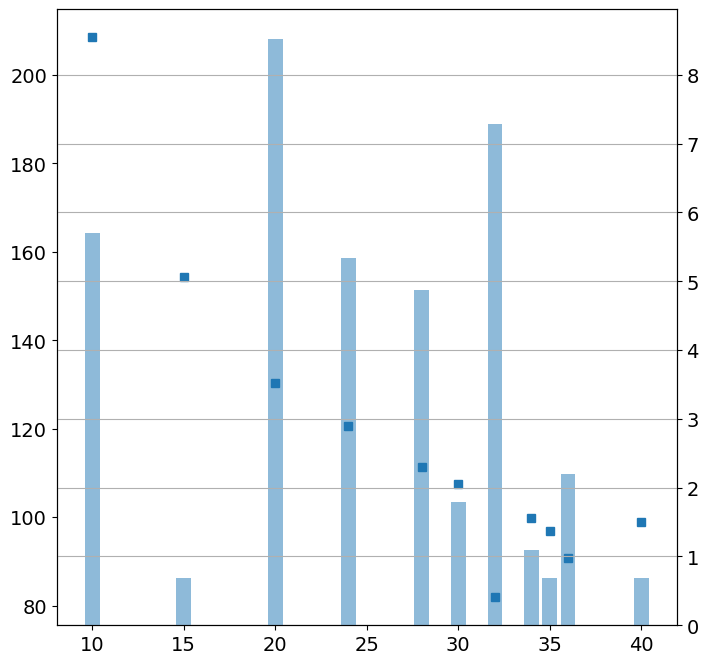

In [66]:
plt.figure(figsize=(8,8))
for i_k, (k, df_k) in enumerate(df_ex.groupby('timestamp_sync')):
    if np.abs(k - 1662228001000) < .50000 * 3600*1000:
    #    plt.plot(df_k['strike'], df_k['mark_iv'], '.-', label=str(k))
        is_v = df_k['volume'] > 0 
        plt.plot(df_k['strike'][is_v], df_k['mark_iv'][is_v], 's', label=str(k))

        plt.sca(plt.gca().twinx())

        plt.bar(df_k['strike'][is_v], np.log(df_k['volume'][is_v].astype('float64')), alpha = 0.5)
#        plt.plot(df_k['strike'], df_k['mark_iv'], '.-', label=str(k))
        # plt.plot(df_k['strike'][is_v], df_k['mark_price'][is_v], 's-', label=str(k))
        # plt.plot(df_k['strike'], df_k['mark_price'], '.-', label=str(k))
#plt.xlim([0, 80])
#plt.legend()
plt.grid(axis='y')
plt.show()

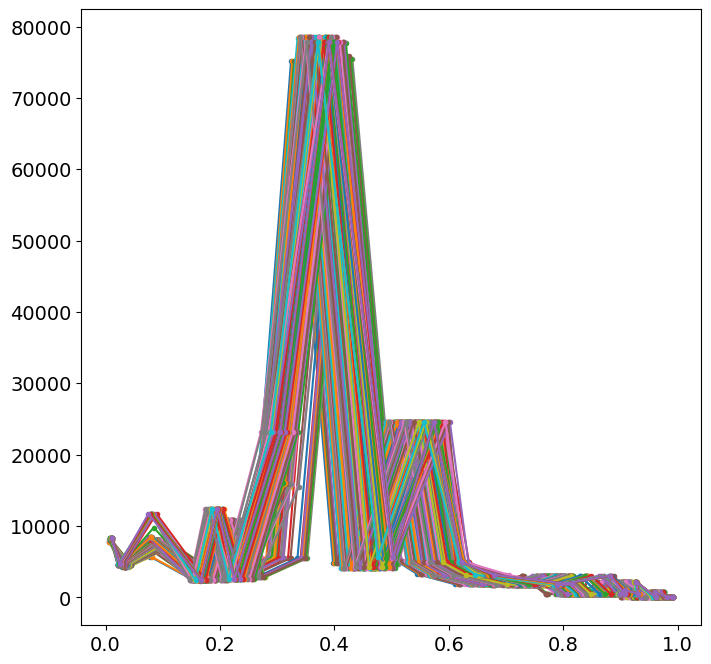

In [38]:
plt.figure(figsize=(8,8))
for k, df_k in df_ex.groupby('timestamp_sync'):
#    plt.plot(-df_k['delta'], df_k['mark_iv'], '.-', label=str(k))
    plt.plot(-df_k['delta'], df_k['open_interest'], '.-', label=str(k))

#plt.legend(loc=4)
plt.show()

In [13]:
def calc_der(x: np.ndarray, y: np.ndarray, order: int):

    # https://www.tandfonline.com/doi/pdf/10.3402/tellusa.v22i1.10155

    do = np.zeros_like(x)

    h = np.hstack((x[1:] - x[:-1], 0.0)) # padded t|o match the size of x & y

    fn, f0, fp = (y[:-2], y[1:-1], y[2:])
    hn, h0, hp = (h[:-2], h[1:-1], y[2:])
    h0_ov_hn = h0/hn

    if order == 1:
        num = fp - h0_ov_hn**2*fn - (1-h0_ov_hn**2)*f0
        den = h0*(1+h0_ov_hn)
        do[1:-1] = num/den
        do[0] = (y[1]-y[0])/(x[1]-x[0])
        do[-1] = (y[-1]-y[-2])/(x[-1]-x[-2])
        return do

    if order == 2:
        num = 2*(fp + h0_ov_hn * fn - (1+h0_ov_hn)*f0)
        den = h0*hn*(1+h0_ov_hn)
        do[1:-1] = num/den

        return do

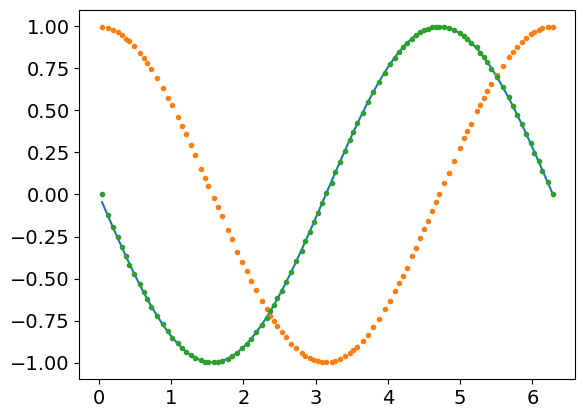

In [14]:
x = np.random.uniform(0.5,1,100).cumsum()
x *= (2*np.pi / x[-1])
y = np.sin(x)
y2 = -y
y2f1 = calc_der(x, y, 1)
y2f2 = calc_der(x, y, 2)

plt.figure()
plt.plot(x,y2, label='a')
plt.plot(x,y2f1, '.', label='f1')
plt.plot(x,y2f2, '.', label='f2')
plt.show()

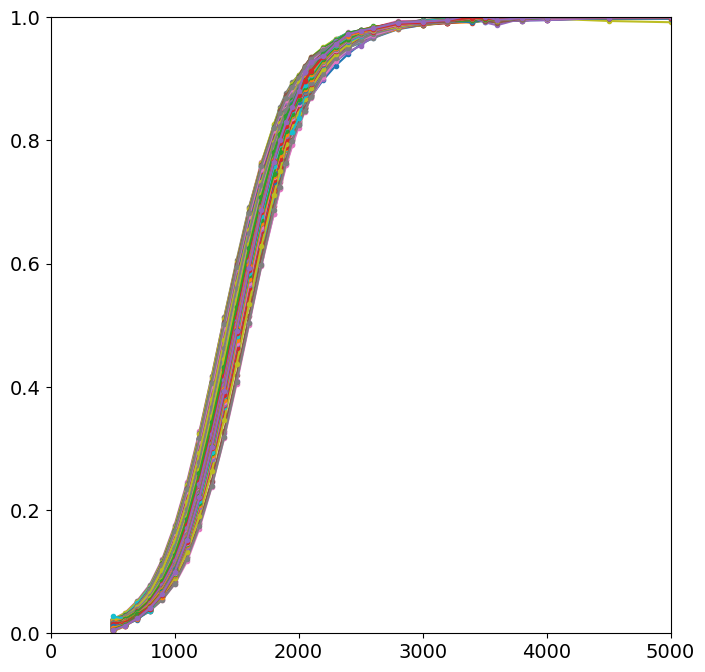

In [15]:
plt.figure(figsize=(8,8))
for k, df_k in df_ex.groupby('timestamp_sync'):
    x = df_k['strike'].to_numpy()
    y = df_k['mark_price'].to_numpy()
    y1 = calc_der(x, y, 1) * df_k['underlying_price'].mean()
    plt.plot(x, y1, '.-', label=str(k))

plt.xlim([0, 5000])
plt.ylim([0, 1])
#plt.legend()
plt.show()

In [16]:
from xcrytoz.analytics.utils import linear_interp_flat_extrap

In [17]:
bin_size = 250
bins = np.arange(0, 20) * bin_size
bin_mid = 0.5*(bins[1:] + bins[:-1])
probs = {}
fwds = {}
for k, df_k in df_ex.groupby('timestamp_sync'):
    x = df_k['strike'].to_numpy()
    y = df_k['mark_price'].to_numpy()
    y1 = calc_der(x, y, 1) * df_k['underlying_price'].mean()
    y1_bins = linear_interp_flat_extrap(x, y1)(bins)
    prob = np.diff(y1_bins) * 100

    probs[k] = prob
    fwds[k] = df_k['underlying_price'].mean()
    
max_p = max([max(p) for p in probs.values()])

In [18]:
pd.DataFrame(probs, index = bins[1:]).T

,250,500,750,1000,1250,1500,1750,2000,2250,2500,2750,3000,3250,3500,3750,4000,4250,4500,4750
1661526002000,0.0,0.0,2.985561,6.913932,15.320644,20.898930,19.943026,15.176604,8.524563,4.596193,2.082036,1.060660,0.674370,0.111304,0.085115,0.027124,0.148156,0.148156,0.013095
1661529602000,0.0,0.0,2.344319,7.345532,15.238072,21.020725,20.656053,15.290168,8.322331,4.493278,1.497759,1.237279,0.074888,0.472120,0.061864,0.241781,0.027909,0.027909,0.023443
1661533201000,0.0,0.0,2.511600,7.766641,15.571922,20.981523,20.968643,14.734722,8.191681,4.018561,1.671180,0.840420,0.473340,0.183540,0.183540,0.158700,-0.047472,-0.047472,0.015456
1661536801000,0.0,0.0,2.464906,7.856886,16.137428,20.759126,20.605070,14.750919,8.087971,3.620330,1.980269,0.985320,0.320951,0.256761,0.157266,0.115634,-0.059422,-0.059422,0.002568
1661540401000,0.0,0.0,2.081168,8.093431,15.994162,21.158542,20.580440,14.259855,8.247592,3.854015,1.849927,0.924964,0.427153,0.266569,-0.032117,0.296392,-0.070473,-0.070473,0.007708
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1662213601000,0.0,0.0,1.830191,7.320764,15.937913,22.953645,23.373064,15.671010,6.634442,2.669029,1.159756,0.479790,0.409887,0.085790,-0.006355,0.276526,-0.104582,-0.104582,-0.015252
1662217202000,0.0,0.0,2.286211,6.858634,16.422618,23.128837,23.179642,15.457328,6.477599,2.819661,1.247890,0.466768,0.396912,0.098434,0.006351,0.259285,-0.048990,-0.048990,0.007621
1662220801000,0.0,0.0,2.629808,6.898483,16.236208,22.791673,23.261735,15.842372,6.669804,3.010940,0.898835,0.358899,0.444654,0.127044,0.006352,0.241928,-0.070782,-0.070782,0.015245
1662224401000,0.0,0.0,2.793938,6.621249,16.112982,22.772505,23.767606,14.888243,7.233619,3.100122,0.966396,0.411436,0.484793,0.204123,-0.044652,0.226176,-0.044834,-0.044834,0.017861


In [19]:
y_max = int(max_p + 3)

In [20]:
def gradientbars(bars):
    grad = np.atleast_2d(np.linspace(0,1,256)).T
    ax = bars[0].axes
    lim = ax.get_xlim()+ax.get_ylim()
    for bar in bars:
        bar.set_zorder(1)
        bar.set_facecolor("none")
        x,y = bar.get_xy()
        w, h = bar.get_width(), bar.get_height()
        if h < 1e-6:
            h = np.maximum(1e-6, h)
        ax.imshow(grad, extent=[x,x+w,y,y+h], aspect="auto", zorder=0, alpha = 0.7, cmap='Purples_r')

        #ax.annotate("{:.1f}".format(y+h), (x,y+h))
    ax.axis(lim)

save_folder = '../temp_data/figs2'
os.makedirs(save_folder, exist_ok=True)



# plot_test = False
# for i_ts, (ts, prob) in enumerate(probs.items()):
#     fig = plt.figure(figsize=(9,5))
#     ax = plt.gca()
#     bar = ax.bar(bin_mid, prob, width=bin_size*0.8)

#     gradientbars(bar)

#     ax.bar_label(bar, padding=3, fmt='%.1f')

#     fwd = fwds[ts]
#     plt.axvline(fwd, lw= 8, color = 'orange', alpha = 0.7, zorder=-100, label='forward')
#     plt.legend(loc=1)
#     plt.xticks(bins)
#     plt.xlim(500, 3000)
#     plt.ylim(0, y_max)
#     plt.grid(axis='y')
#     plt.xlabel('strike ($)')
#     plt.ylabel('probability (%)')
#     plt.title(Converter.ms2dt(ts).strftime('%Y-%m-%d %H:00 (UTC)'))
# #    plt.annotate('source: deribit exchange', (.5,0), xycoords='figure fraction')
#     plt.text(1, -0.12, 'data source: deribit.com', size=10, transform=plt.gca().transAxes, ha='right')
#     if plot_test:
#         plt.show()
#         break
#     else:
#         plt.savefig(os.path.join(save_folder, str(ts))+'.png')
#         plt.close()


In [21]:
# import cv2
# from PIL import Image

In [22]:
# def generate_video():
#     image_folder = save_folder
#     video_name = '../temp_data/prob2.mp4'
#     #os.chdir("/home/ganesh/Desktop/video")
#     #images = [img for img in os.listdir(image_folder) if img.endswith(".jpg") or
#     #         img.endswith(".jpeg") or img.endswith("png")]
#     images = sorted(os.listdir(image_folder))

#     fourcc = cv2.VideoWriter_fourcc(*'mp4v') 

#     # Array images should only consider 
#     # the image files ignoring others if any 
    
#     frame = cv2.imread(os.path.join(image_folder, images[0]))
    
#     # setting the frame width, height width 
#     # the width, height of first image 
#     height, width, layers = frame.shape

#     video = cv2.VideoWriter(video_name, fourcc, 8, (width, height), isColor=True)

#     # Appending the images to the video one by one 
#     for image in images:
#         img = cv2.imread(os.path.join(image_folder,image))
#         img = cv2.resize(img, (width, height))
#         video.write(img)
        
#     # Deallocating memories taken for window creation 
#     cv2.destroyAllWindows()
#     video.release()  # releasing the video generated 
    
# generate_video()

In [23]:
import matplotlib.animation as manimation

0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190


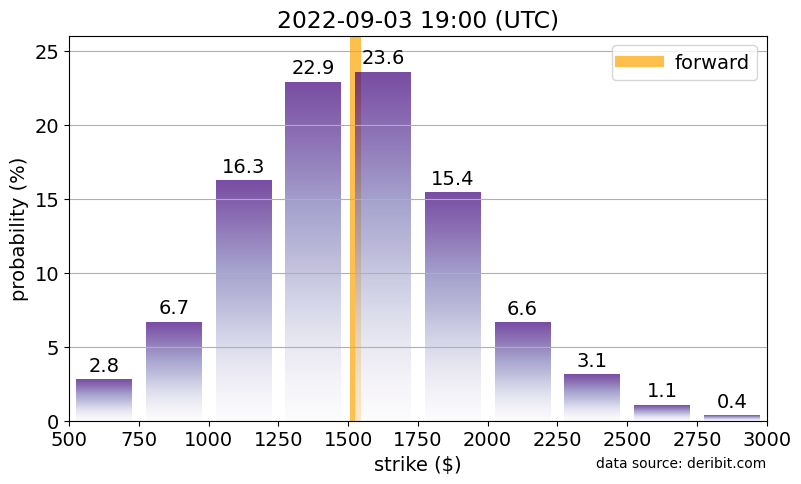

In [24]:
# Define the meta data for the movie
FFMpegWriter = manimation.writers['ffmpeg']
metadata = dict(title='Movie Test', artist='Matplotlib',
                comment='ETH options')
writer = FFMpegWriter(fps=10, metadata=metadata)

# Initialize the movie
fig = plt.figure(figsize=(9,5))
with writer.saving(fig, "writer_test.mp4", 100):
    for i_ts, (ts, prob) in enumerate(probs.items()):
        if i_ts % 10 == 0: 
            print(i_ts)
        ax = plt.gca()
        ax.cla()
        bar = ax.bar(bin_mid, prob, width=bin_size*0.8)

        gradientbars(bar)

        ax.bar_label(bar, padding=3, fmt='%.1f')

        fwd = fwds[ts]
        plt.axvline(fwd, lw= 8, color = 'orange', alpha = 0.7, zorder=-100, label='forward')
        plt.legend(loc=1)
        plt.xticks(bins)
        plt.xlim(500, 3000)
        plt.ylim(0, y_max)
        plt.grid(axis='y')
        plt.xlabel('strike ($)')
        plt.ylabel('probability (%)')
        plt.title(Converter.ms2dt(ts).strftime('%Y-%m-%d %H:00 (UTC)'))
    #    plt.annotate('source: deribit exchange', (.5,0), xycoords='figure fraction')
        plt.text(1, -0.12, 'data source: deribit.com', size=10, transform=plt.gca().transAxes, ha='right')
        # if plot_test:
        #     plt.show()
        #     break
        # else:
        #     plt.savefig(os.path.join(save_folder, str(ts))+'.png')
        #     plt.close()

        writer.grab_frame()

In [127]:
344.50/0.2250, 278.69/0.1820

(1531.111111111111, 1531.2637362637363)

In [129]:
np.sum(0.5*(y2[1:] + y2[:-1]) * (x[1:] - x[:-1])) * 1555.25

0.9877859324999992

In [112]:
s, be, bi = binned_statistic(x, y2, statistic='mean', bins=bins)

In [130]:
df_k['strike'].diff()

253        NaN
255      100.0
257      100.0
259      100.0
261      100.0
263      100.0
265      100.0
267      100.0
269      100.0
271      100.0
273      100.0
275      100.0
277      100.0
279      100.0
281       50.0
283       50.0
285       50.0
287       50.0
289       50.0
291       50.0
293      100.0
295      100.0
297      100.0
299      100.0
301      100.0
303      200.0
305      200.0
307      200.0
309      200.0
311      100.0
313      100.0
315      200.0
317      200.0
319      500.0
321      500.0
323     1000.0
325     1000.0
327     1000.0
329     1000.0
331     1000.0
333     5000.0
335     5000.0
337     5000.0
339     5000.0
341     5000.0
343     5000.0
345    10000.0
Name: strike, dtype: float64

In [117]:
s * 250

array([            nan,             nan,  1.41666667e-05,  3.50000000e-05,
        9.16666667e-05,  1.36250000e-04,  1.45000000e-04,  1.03333333e-04,
        5.27083333e-05,  2.75000000e-05,  1.25000000e-05,  6.25000000e-06,
        2.81250000e-06, -5.00000000e-06,  5.00000000e-06,  6.25000000e-07,
        1.42857143e-07,             nan,  4.00000000e-07])

In [114]:
s

array([            nan,             nan,  5.66666667e-08,  1.40000000e-07,
        3.66666667e-07,  5.45000000e-07,  5.80000000e-07,  4.13333333e-07,
        2.10833333e-07,  1.10000000e-07,  5.00000000e-08,  2.50000000e-08,
        1.12500000e-08, -2.00000000e-08,  2.00000000e-08,  2.50000000e-09,
        5.71428571e-10,             nan,  1.60000000e-09])

In [101]:
type(coll)

NoneType

In [16]:
da = reader.read('BTC', 'option', Converter.dt2ms_int(datetime.utcnow()), False)

xcrytoz.deribit_data.file_io_utils - INFO - executed successfully: SELECT min(timestamp), max(timestamp) FROM timestamp2filepath
xcrytoz.deribit_data.file_io_utils - INFO - executed successfully: SELECT timestamp FROM timestamp2filepath
WHERE timestamp >= 1661526002000 AND timestamp <= 1662030002000 AND currency = "BTC" AND kind = "option"
xcrytoz.deribit_data.file_io_utils - INFO - executed successfully: SELECT * FROM timestamp2filepath
WHERE timestamp = 1662030002000 AND currency = "BTC" AND kind = "option"


In [65]:
surf = VolatilitySurfaceDeribit('BTC', da.timestamp, da.data)
surf.build()

In [67]:
surf.get_surface_summary_in_npdelta().T

expiration_timestamp      1662105600000 1662192000000 1662710400000  \
forward           forward  20070.584722  20069.280509  20059.101765   
neg_put_delta_pac 10P               0.1           0.1           0.1   
                  25P              0.25          0.25          0.25   
                  ATMF              0.5           0.5           0.5   
                  25C              0.75          0.75          0.75   
                  10C               0.9           0.9           0.9   
strike            10P       19051.90707  18644.170369  17279.195779   
                  25P      19603.518268  19427.927928  18810.827936   
                  ATMF     20079.979832  20088.249656  20138.463605   
                  25C      20473.891532  20692.186196   21336.14222   
                  10C      20911.592325  21399.709054  22510.314508   
volatility_pac    10P          84.72906     81.515853     81.798205   
                  25P         70.451516     69.112252     69.625822   
                  ATMF         62.85334     62.165787     61.577991   
                  25C         60.111715     59.539937     58.296798   
                  10C         63.337984     63.005594     59.379303   
extrapolated_pac  10P             False         False         False   
                  25P             False         False         False   
                  ATMF            False         False         False   
                  25C             False         False         False   
                  10C             False         False         False   
volatility_arf    ATMF         62.85334     62.165787     61.577991   
                  25RR       -10.339801     -9.572315    -11.329024   
                  25FLY        2.428275      2.160307      2.383319   
                  10RR       -21.391075    -18.510259    -22.418901   
                  10FLY       11.180182     10.094936      9.010763   
extrapolated_arf  ATMF            False         False         False   
                  25RR            False         False         False   
                  25FLY           False         False         False   
                  10RR            False         False         False   
                  10FLY           False         False         False   

expiration_timestamp      1663315200000 1663920000000 1664524800000  \
forward           forward    20065.6122  20071.543352  20076.426216   
neg_put_delta_pac 10P               0.1           0.1           0.1   
                  25P              0.25          0.25          0.25   
                  ATMF              0.5           0.5           0.5   
                  25C              0.75          0.75          0.75   
                  10C               0.9           0.9           0.9   
strike            10P      16345.869174  15655.646654   15120.33814   
                  25P      18370.826863  18052.948993  17803.119442   
                  ATMF     20231.309616  20331.448877  20433.160622   
                  25C      21956.306932  22566.015457  23046.117227   
                  10C      23822.091062  24957.500574  25986.305278   
volatility_pac    10P         84.031172     85.709564      86.74814   
                  25P         72.470365     74.009263     74.586801   
                  ATMF        63.812474     65.607102     66.826031   
                  25C          60.63981     63.029816     64.091675   
                  10C         62.780438     65.349251     66.718773   
extrapolated_pac  10P             False         False         False   
                  25P             False         False         False   
                  ATMF            False         False         False   
                  25C             False         False         False   
                  10C             False         False         False   
volatility_arf    ATMF        63.812474     65.607102     66.826031   
                  25RR       -11.830555    -10.979447    -10.495126   
                  25FLY

In [42]:
pd.MultiIndex.from_arrays([['forward'],['forward']])
df_fwd = pd.DataFrame(surf.ds_fwd, columns=pd.MultiIndex.from_arrays([['forward'],['forward']]))
df = pd.concat([df_fwd, surf.df_md_at, surf.df_md_arf], axis=1)

In [48]:
df[['forward', 'volatility']].columns.droplevel(0)

Index(['forward', '10P', '25P', 'ATMF', '25C', '10C', 'ATMF', '25RR', '25FLY',
       '10RR', '10FLY'],
      dtype='object')

In [46]:
np.integer(123) #isinstance(da.timestamp, )

TypeError: cannot create 'numpy.integer' instances

In [44]:
type(da.timestamp)

numpy.int64

In [29]:
da.attributes

{'batch_id': '20220901120002',
 'save_folder': '/home/lee_youngsuk/data/deribit/202209',
 'time_start': 1662033603,
 'time_end': 1662033701}

In [16]:
for k in da.data:
    print(k)

instruments
tickers
missing


In [22]:
da.data['tickers'][0]

{'underlying_price': 20069.26,
 'underlying_index': 'BTC-2SEP22',
 'timestamp': 1662033604341,
 'stats': {'volume': None, 'price_change': None, 'low': None, 'high': None},
 'state': 'open',
 'settlement_price': 0.34603172,
 'open_interest': 0.0,
 'min_price': 0.3325,
 'max_price': 0.371,
 'mark_price': 0.3522,
 'mark_iv': 127.05,
 'last_price': None,
 'interest_rate': 0.0,
 'instrument_name': 'BTC-2SEP22-13000-C',
 'index_price': 20076.92,
 'greeks': {'vega': 0.0,
  'theta': 0.0,
  'rho': 0.2968,
  'gamma': 0.0,
  'delta': 1.0},
 'estimated_delivery_price': 20076.92,
 'bid_iv': 0.0,
 'best_bid_price': 0.277,
 'best_bid_amount': 3.0,
 'best_ask_price': 0.4675,
 'best_ask_amount': 3.0,
 'ask_iv': 500.0}

In [33]:
df = qdb.get_mapping_in_range('BTC', 'option')

In [38]:
d = qdb.read_zip(df.iloc[-1]['path'])

In [59]:
x = reader.collect_all_files()

In [61]:
x['20220829020001_BTC_future']

('/home/youngsuklee/data/deribit_test/202208/20220829020001_BTC_future.zip',
 ZipFileNameInfo(timestamp_ms=1661734801000, currency='BTC', kind='future'))

In [35]:
from pathlib import Path
for path in Path(root_save_folder).iterdir():
    if path.is_dir():
        print(path)

/home/youngsuklee/data/deribit_test/202208


In [41]:
os.path.splitext(dir)

('file', '.txt')

In [34]:

for path in os.scandir(root_save_folder):
    if path.is_dir():
        print(path)

<DirEntry '202208'>


In [ ]:
'22'.isdi

In [10]:
dbm = FilePathMappingDB(root_save_folder)

In [11]:
dbm.drop_mapping_table()

xcrytoz.deribit_data.file_io_utils - INFO - executed successfully: DROP TABLE timestamp2filepath


In [12]:
dbm.create_mapping_table()

xcrytoz.deribit_data.file_io_utils - INFO - executed successfully: SELECT name FROM sqlite_master WHERE type="table" AND name="timestamp2filepath";
xcrytoz.deribit_data.file_io_utils - INFO - executed successfully: CREATE TABLE IF NOT EXISTS "timestamp2filepath" (
timestamp_ms INT,datetime TEXT,
currency TEXT,
kind TEXT,
path TEXT
);
xcrytoz.deribit_data.file_io_utils - INFO - executed successfully: CREATE INDEX IF NOT EXISTS "ftimestamp_ms_index" ON "timestamp2filepath" (
"timestamp_ms"
);


In [13]:
for n in range(100):
    time.sleep(0.01)
    ts_ms = Converter.dt2ms_int(datetime.utcnow())
    dbm.insert_mapping(ts_ms, 'BTC', 'option', 'xage' + str(n+1000))

xcrytoz.deribit_data.file_io_utils - INFO - executed successfully: INSERT INTO
   timestamp2filepath (timestamp_ms, datetime, currency, kind, path)
VALUES
  (1661975464218, "20220831205104", "BTC", "option", "xage1000");
xcrytoz.deribit_data.file_io_utils - INFO - executed successfully: INSERT INTO
   timestamp2filepath (timestamp_ms, datetime, currency, kind, path)
VALUES
  (1661975464233, "20220831205104", "BTC", "option", "xage1001");
xcrytoz.deribit_data.file_io_utils - INFO - executed successfully: INSERT INTO
   timestamp2filepath (timestamp_ms, datetime, currency, kind, path)
VALUES
  (1661975464247, "20220831205104", "BTC", "option", "xage1002");
xcrytoz.deribit_data.file_io_utils - INFO - executed successfully: INSERT INTO
   timestamp2filepath (timestamp_ms, datetime, currency, kind, path)
VALUES
  (1661975464265, "20220831205104", "BTC", "option", "xage1003");
xcrytoz.deribit_data.file_io_utils - INFO - executed successfully: INSERT INTO
   timestamp2filepath (timestamp_ms, 

In [16]:
dbm.remove(1661975464365, 1661975464409)

xcrytoz.deribit_data.file_io_utils - INFO - executed successfully: SELECT name FROM sqlite_master WHERE type="table" AND name="timestamp2filepath";
xcrytoz.deribit_data.file_io_utils - INFO - executed successfully: SELECT count(*) from timestamp2filepath
xcrytoz.deribit_data.file_io_utils - INFO - executed successfully: SELECT min(timestamp_ms), max(timestamp_ms) FROM timestamp2filepath
xcrytoz.deribit_data.file_io_utils - INFO - executed successfully: DELETE FROM timestamp2filepath WHERE timestamp_ms >= 1661975464365 and timestamp_ms <= 1661975464409


In [7]:
root_save_folder = r'/home/youngsuklee/data/deribit_test'
fzdr = FileZipDaoReader(root_save_folder)

In [85]:
import sqlite3
from sqlite3 import Error
from contextlib import contextmanager

In [90]:
xx = 'sss'

In [91]:
(f"xxx{xx}" 
"yyyy")

'xxxsssyyyy'

In [80]:
connection = sqlite3.connect('my_db.sqlite')

In [58]:
def execute_query(connection, query):
    cursor = connection.cursor()
    try:
        cursor.execute(query)
        connection.commit()
        print("Query executed successfully")
    except Error as e:
        print(f"The error '{e}' occurred")

In [59]:
create_file_mapping_table = """
CREATE TABLE IF NOT EXISTS FileMapping (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    timestamp REAL,
    currency TEXT,
    type TEXT,
    path TEXT
);

CREATE INDEX "timestamp_index" ON "FileMapping" (
	"timestamp"
);
"""

In [33]:
datetime.utcnow().timestamp() - datetime.now().timestamp()


-3600.0000081062317

In [34]:
datetime.utcnow().timestamp() - time.time()

-3600.0000083446503

In [36]:
datetime.now().timestamp() - time.time()

-6.4373016357421875e-06

In [37]:
datetime.fromtimestamp(time.time())

datetime.datetime(2022, 8, 31, 16, 32, 11, 107071)

In [30]:
from datetime import timezone
import time
datetime.fromtimestamp(time.time(), tz=timezone.utc)

datetime.datetime(2022, 8, 31, 15, 28, 57, 317464, tzinfo=datetime.timezone.utc)

In [60]:
execute_query(connection, create_file_mapping_table)

Query executed successfully


In [68]:
execute_query(connection, "SELECT count(name) FROM sqlite_master WHERE type='table' AND name='FileMapping';")

Query executed successfully


In [76]:
add_mapping = """
INSERT INTO 
    FileMapping (timestamp, currency, type, path)
VALUES
    (234353323.4, 'BTC', 'option', 'xxx')
"""

In [70]:
def execute_read_query(connection, query):
    cursor = connection.cursor()
    result = None
    try:
        cursor.execute(query)
        result = cursor.fetchall()
        return result
    except Error as e:
        print(f"The error '{e}' occurred")

In [81]:
execute_read_query(connection, "SELECT count(name) FROM sqlite_master WHERE type='table' AND name='FileMapping';")

[(1,)]

In [74]:
res = _

In [75]:
res

[(1,)]

In [82]:
execute_query(connection, add_mapping)

Query executed successfully


In [84]:
execute_read_query(connection, "SELECT type FROM FileMapping ;")

[('option',), ('option',)]

In [63]:
import time
time.time()

1661952255.5216825

In [64]:
time.time()

1661952257.6972477

In [79]:
connection.close()

In [15]:
attrib, data = fzdr.read(datetime.now(), 'BTC', 'future')

xcrytoz.deribit_data.file_io_utils - WARNING - no data found for 2022-08-31 13:51:26.721888


In [1]:
import os

import sys
sys.path

['/home/youngsuklee/repos/cdc/drivers',
 '/home/youngsuklee/miniconda3/envs/cdc/lib/python310.zip',
 '/home/youngsuklee/miniconda3/envs/cdc/lib/python3.10',
 '/home/youngsuklee/miniconda3/envs/cdc/lib/python3.10/lib-dynload',
 '',
 '/home/youngsuklee/miniconda3/envs/cdc/lib/python3.10/site-packages']

In [4]:
cwd = os.getcwd()

'/home/youngsuklee/repos/cdc'

In [5]:
os.path.basename(os.path.dirname(cwd))

'cdc'

In [6]:
import pathlib


In [7]:
pathlib.Path(cwd).parent.parent

PosixPath('/home/youngsuklee/repos')

In [9]:
sys.path

['/home/youngsuklee/repos/cdc/drivers',
 '/home/youngsuklee/repos/cdc',
 '/home/youngsuklee/miniconda3/envs/cdc/lib/python310.zip',
 '/home/youngsuklee/miniconda3/envs/cdc/lib/python3.10',
 '/home/youngsuklee/miniconda3/envs/cdc/lib/python3.10/lib-dynload',
 '',
 '/home/youngsuklee/miniconda3/envs/cdc/lib/python3.10/site-packages',
 '..']

In [10]:
os.path.commonprefix(['abcdef','abcdee'])

'abcde'

In [11]:
import da

ModuleNotFoundError: No module named 'da'

In [12]:
from datetime import datetime

In [15]:
abs(datetime.now() - datetime.now())

datetime.timedelta(microseconds=2)

In [6]:
import xcrytoz as xc

In [7]:
cst = xc.Col2Str()

In [76]:
from deribit_downloader import DeribitDownloader_Simple,Col2Str,batch_download


%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [77]:
batch_id = 'test'
save_folder = './temp_data/test'

In [78]:
batch_download(batch_id, save_folder)

downloading BTC future
writing to json ./temp_data/test/test_BTC_future.zip
downloading BTC option
writing to json ./temp_data/test/test_BTC_option.zip
downloading ETH future
writing to json ./temp_data/test/test_ETH_future.zip
downloading ETH option
writing to json ./temp_data/test/test_ETH_option.zip
downloading SOL future
writing to json ./temp_data/test/test_SOL_future.zip
downloading SOL option
writing to json ./temp_data/test/test_SOL_option.zip
done


In [79]:
from pathlib import Path
home = str(Path.home())

In [80]:
home

'/home/youngsuklee'

In [19]:
_cst = Col2Str()

In [24]:
dds = DeribitDownloader_Simple()

In [39]:
dn = dds.download_tickers('BTC', 'option')

In [40]:
import zipfile

In [41]:
import pickle

In [42]:
with open('p.pkl', 'wb') as pf:
    pickle.dump(dn, pf, protocol=pickle.HIGHEST_PROTOCOL)

In [43]:
import json
with open('d.json', 'w') as jf:
    jf.write(json.dumps(dn))

In [44]:
with zipfile.ZipFile('zip.zip', mode='w', compression=zipfile.ZIP_DEFLATED, compresslevel=9) as zip_file: 
    dumped_json: str = json.dumps(dn, ensure_ascii=False, indent=4)
    zip_file.writestr('data.json', data=dumped_json)
    zip_file.testzip()

In [57]:
with zipfile.ZipFile('zip.zip', 'r') as myzip:

    data = json.loads(myzip.read('data.json'))

In [67]:
from file_io_utils import *

In [68]:
aaa, ddd = read_zipped_json(r'./zipattr.zip')

In [71]:
type(ddd)

dict

In [72]:
import itertools

[autoreload of deribit_downloader failed: Traceback (most recent call last):
  File "/home/youngsuklee/miniconda3/envs/cdc/lib/python3.10/site-packages/IPython/extensions/autoreload.py", line 257, in check
    superreload(m, reload, self.old_objects)
  File "/home/youngsuklee/miniconda3/envs/cdc/lib/python3.10/site-packages/IPython/extensions/autoreload.py", line 455, in superreload
    module = reload(module)
  File "/home/youngsuklee/miniconda3/envs/cdc/lib/python3.10/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 619, in _exec
  File "<frozen importlib._bootstrap_external>", line 879, in exec_module
  File "<frozen importlib._bootstrap_external>", line 1017, in get_code
  File "<frozen importlib._bootstrap_external>", line 947, in source_to_code
  File "<frozen importlib._bootstrap>", line 241, in _call_with_frames_removed
  File "/home/youngsuklee/repos/cdc/deribit_downloader.py", line 129
    for currency

In [74]:
for x, y in itertools.product(['x1','x2'], ['y1', 'y2']):
    print(x, y)

x1 y1
x1 y2
x2 y1
x2 y2


In [75]:
import time